<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2024-12-12 19:21:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  63.7MB/s    in 2.4s    

2024-12-12 19:21:33 (63.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



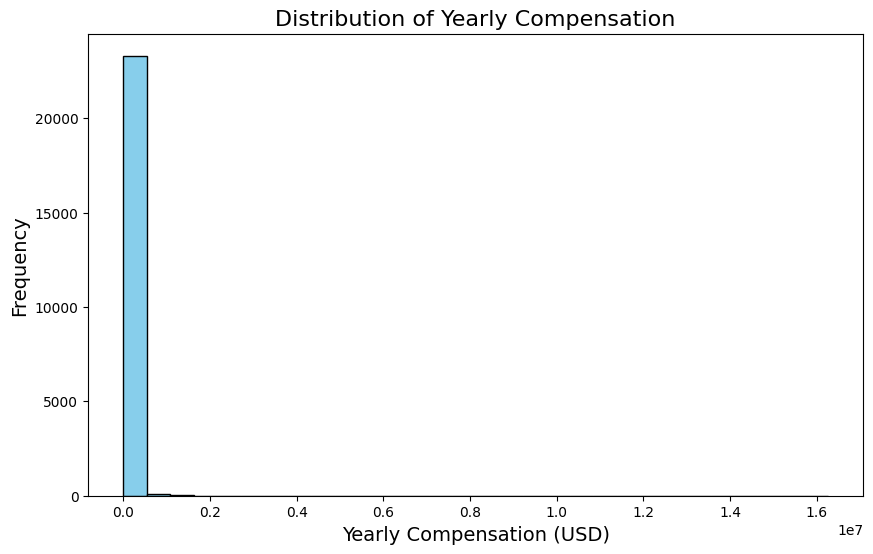

In [4]:
## Write your code here


# Plot the histogram of the 'ConvertedCompYearly' column
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedCompYearly'].dropna(), bins=30, edgecolor='black', color='skyblue')  # dropna() to handle missing values
plt.title('Distribution of Yearly Compensation', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



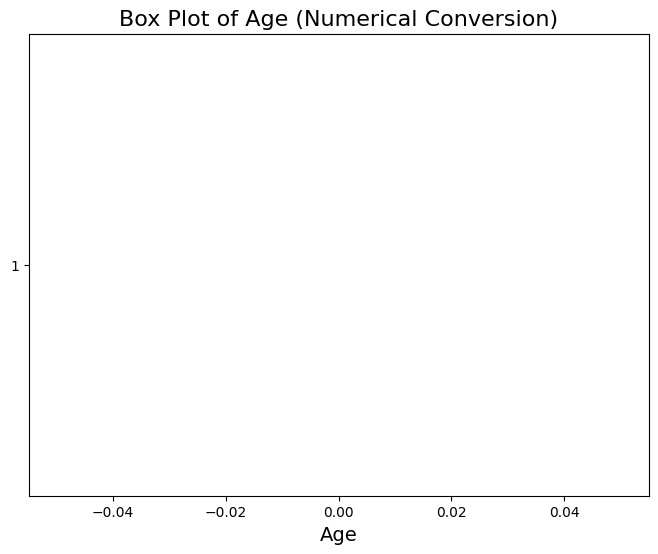

In [8]:
## Write your code here

# Sample Age categories mapping to their numerical midpoints
age_mapping = {
    '18-25': 21,
    '26-35': 30,
    '36-45': 40,
    '46-55': 50,
    '56-65': 60,
    '66+': 70
}

# Convert the 'Age' column to numerical values using the mapping
df['Age_Numeric'] = df['Age'].map(age_mapping)

# Drop rows where 'Age' is missing or NaN
df = df.dropna(subset=['Age_Numeric'])

# Create a box plot of the numerical Age values
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age_Numeric'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='blue'),
            whiskerprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=5))

# Add titles and labels
plt.title('Box Plot of Age (Numerical Conversion)', fontsize=16)
plt.xlabel('Age', fontsize=14)

# Show the plot
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



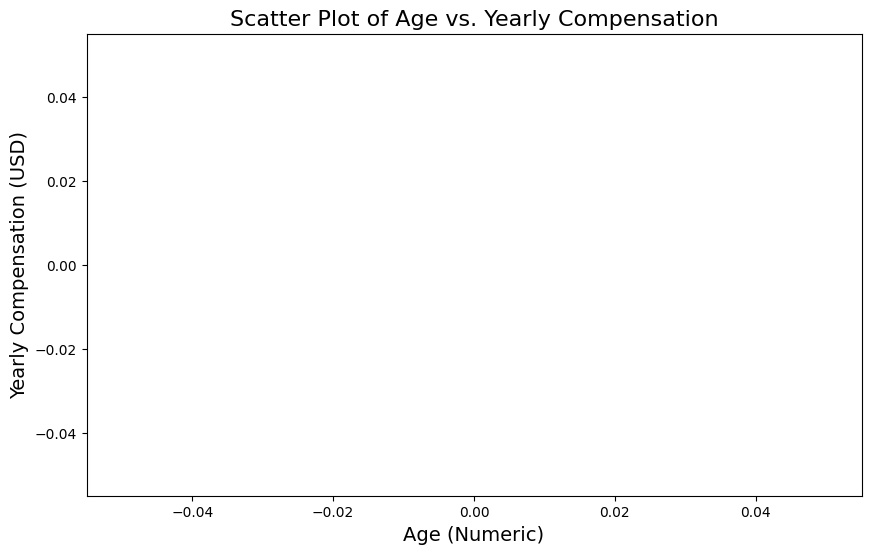

In [13]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt


# Sample Age categories mapping to their numerical midpoints (update this based on your data)
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
# Convert the 'Age' column to numerical values using the mapping
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows where 'Age_numeric' or 'ConvertedCompYearly' is missing or NaN
#df = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age_numeric'], df['ConvertedCompYearly'], alpha=0.6, color='skyblue', edgecolors='w', s=50)

# Add titles and labels
plt.title('Scatter Plot of Age vs. Yearly Compensation', fontsize=16)
plt.xlabel('Age (Numeric)', fontsize=14)
plt.ylabel('Yearly Compensation (USD)', fontsize=14)

# Show the plot
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


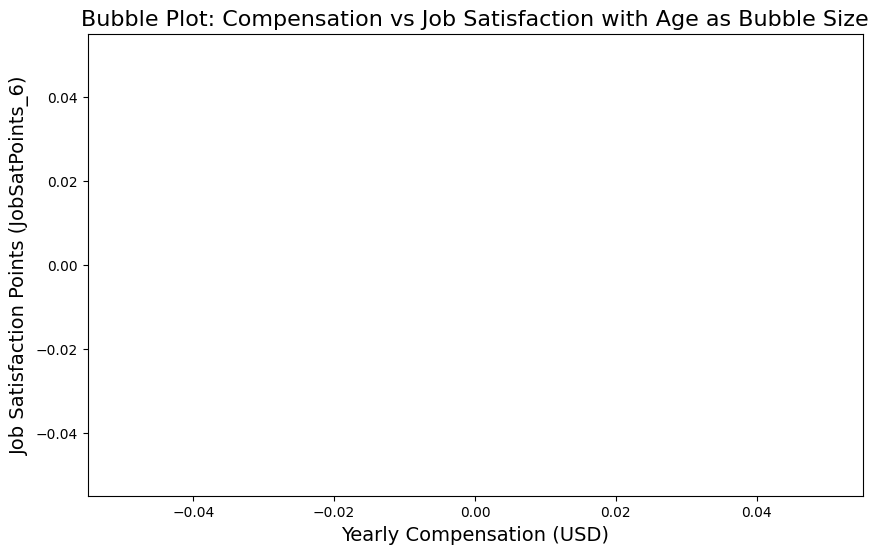

In [11]:
## Write your code here


# Convert Age categories to numerical midpoints
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with missing values in essential columns for the bubble plot
df = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric'])

# Scale the Age_numeric for bubble size (optional, adjust multiplier as needed)
bubble_size = df['Age_numeric'] * 10  # You can change 10 to any value depending on the scaling needed

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], 
            s=bubble_size, alpha=0.6, color='skyblue', edgecolors='w', linewidth=0.5)

# Add titles and labels
plt.title('Bubble Plot: Compensation vs Job Satisfaction with Age as Bubble Size', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=14)
plt.ylabel('Job Satisfaction Points (JobSatPoints_6)', fontsize=14)

# Show the plot
plt.show()



### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



In [ ]:
## Write your code here

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



In [ ]:
## Write your code here

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


In [ ]:
## Write your code here

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



In [ ]:
## Write your code here

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



IndexError: index 0 is out of bounds for axis 0 with size 0

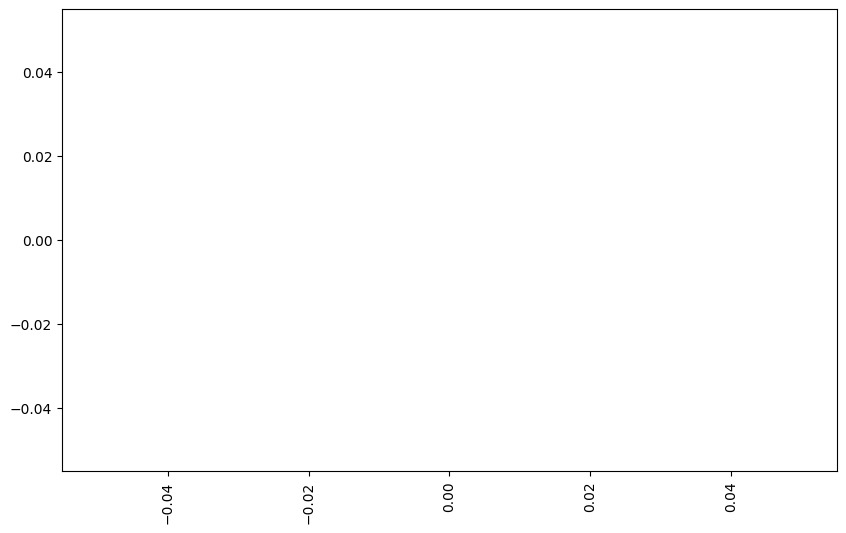

In [14]:
## Write your code here

# Map age categories to numerical midpoints for easier handling (optional)
age_mapping = {
    'Under 18 years old': 'Under 18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+'
}

# Replace age categories with mapped values
df['Age_group'] = df['Age'].map(age_mapping)

# Drop rows where ConvertedCompYearly or Age is missing
df = df.dropna(subset=['ConvertedCompYearly', 'Age_group'])

# Group by age group and calculate the median of ConvertedCompYearly
median_compensation_by_age = df.groupby('Age_group')['ConvertedCompYearly'].median()

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
median_compensation_by_age.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Median Yearly Compensation by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Median Compensation (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability

# Show the plot
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [ ]:
## Write your code here

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
